In [8]:
import numpy as np
from autograd import numpy as anp
# from autograd import jacobian, hessian
import  matplotlib.pyplot as plt
# from maxent import MaxEnt
from scipy.stats import norm, laplace, expon, pareto, vonmises

import sys
sys.path.append('../')
import python_files

1. Normal

In [9]:
mu = 0 # mean
s2 = 4 # variance


b1 = d.b_constraint_normal1(mu,s2)
b2 = d.b_constraint_normal2(mu,s2)

l = -10
u = 10
n = 40

Estimate of absolute integration error of norm. const.: 4.346e-09
The resulting parameters:
  Lambda_1 = -0.125


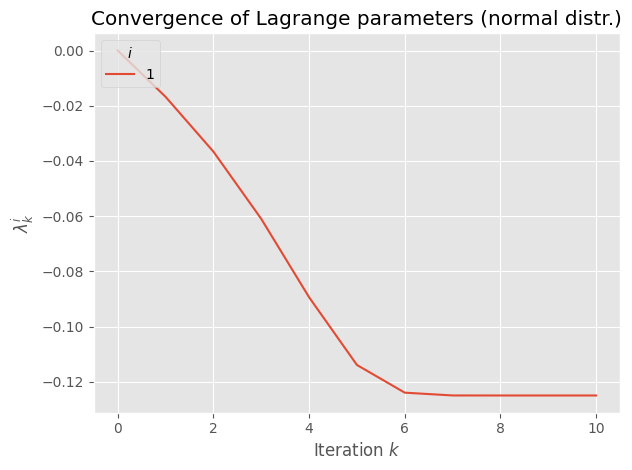

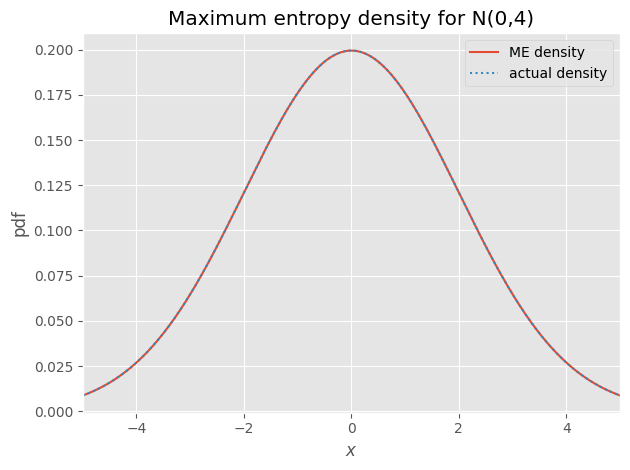

The (Euclidian) distance between result and actual parameter:
1.859e-06


In [10]:
ob = MaxEnt(support=(l,u),
            n_quadrature=n,
            b_constraints=b1,
            f_vector=d.f_constraint_normal1,
            f_param=[mu])
ob._algorithm()
ob._visualize_algorithm(title="Convergence of Lagrange parameters (normal distr.)")

ob._visualize_solution(xlim=(-5+mu,mu+5), 
                       title = f"Maximum entropy density for N({mu},{s2})", 
                       actual_density=d.norm_pdf, 
                       actual_param=(mu,np.sqrt(s2)),
                       actual_lambda=d.lambda_actual_normal1(mu,s2))

Estimate of absolute integration error of norm. const.: 4.346e-09
The resulting parameters:
  Lambda_1 = 0.000
  Lambda_2 = -0.125


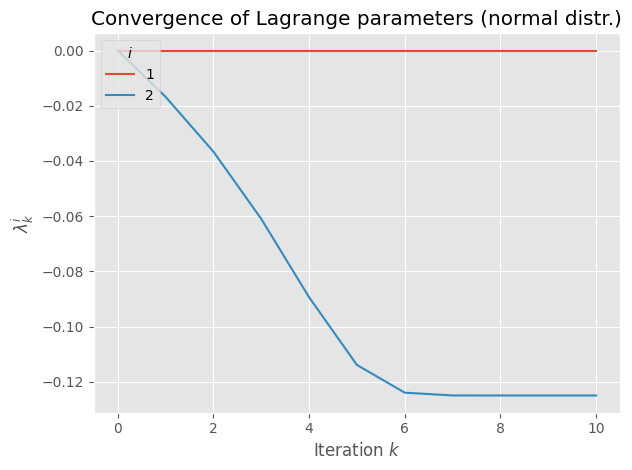

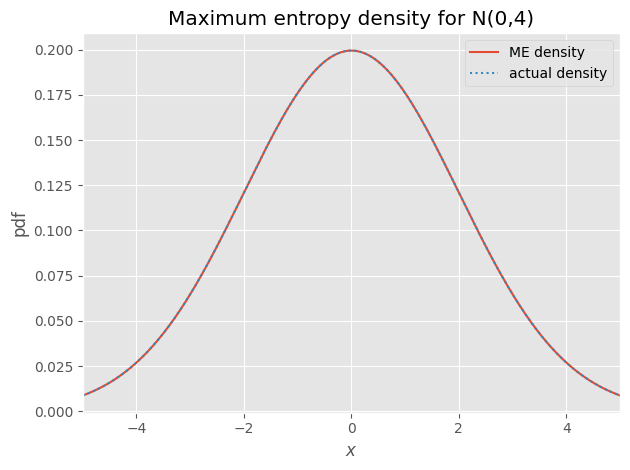

The (Euclidian) distance between result and actual parameter:
1.859e-06


In [11]:
#second option: using two constraints 
ob = MaxEnt(support=(l,u),
            n_quadrature=n,
            b_constraints=b2,
            f_vector=d.f_constraint_normal2)
ob._algorithm()
ob._visualize_algorithm(title="Convergence of Lagrange parameters (normal distr.)")
ob._visualize_solution(xlim=(-5+mu,mu+5), 
                       title = f"Maximum entropy density for N({mu},{s2})", 
                       actual_density=d.norm_pdf, 
                       actual_param=(mu,np.sqrt(s2)),
                       actual_lambda=d.lambda_actual_normal2(mu,s2))

In [ ]:
# test of different supports and different quadrature sizes
mu = 0
s2 = 12

b2 = d.b_constraint_normal2(mu,s2)

a = np.arange(5,150,10) # support [-a,a]

ns = [20,40,80,100,120,150]

l_arr = np.zeros(len(a))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(2*norm.cdf(a, loc=mu, scale=s2)-1)

for i, n in enumerate(ns):
    for j, u in enumerate(a):
        l = -u
        ob_laplace = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=b2,
                            f_vector=d.f_constraint_normal2)
        ob_laplace._algorithm()
        l_arr[j] = ob_laplace._calc_error(d.lambda_actual_normal2(mu,s2))
    ax.plot(xx, l_arr, label=f"$n={n}$")


ax.legend()
ax.set_xlabel("Fraction of support not contained in $[-u,u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with normal distribution ($\\mu={mu},\\sigma^2={s2}$)")
plt.tight_layout()
plt.show()

TypeError: MaxEnt._algorithm() got an unexpected keyword argument 'warning'

2. Laplace

E(|X-mu|)=b

In [6]:
mu = 0
c = 1


l,u = -30,30
n = 60

The resulting parameters:
  Lambda_1 = -1.339


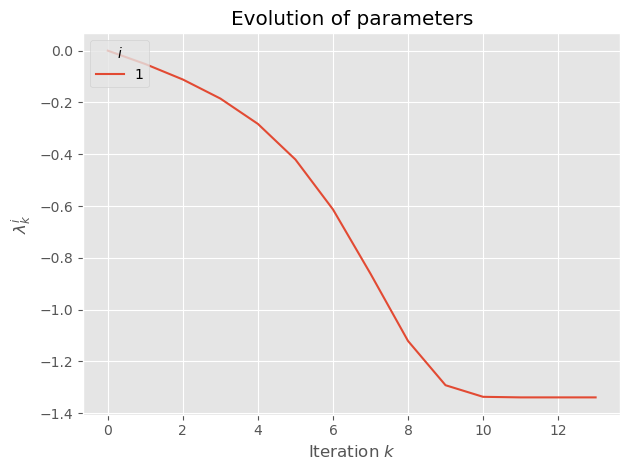

Estimate of absolute integration error of norm. const.: 4.788e-14


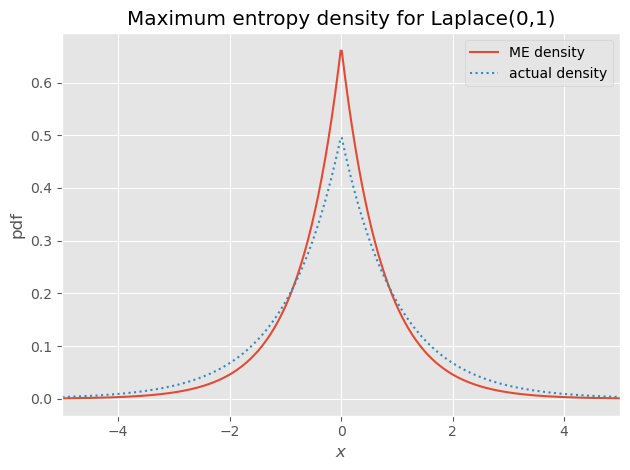

The (Euclidian) distance between result and actual parameter:
3.386e-01


In [7]:
ob_laplace = MaxEnt(support=(l,u),
                    n_quadrature=n,
                    b_constraints=d.b_constraint_laplace(mu,c),
                    f_vector=d.f_constraint_laplace,
                    f_param=[mu])
ob_laplace._algorithm()
ob_laplace._visualize_algorithm()
ob_laplace._visualize_solution(xlim=(mu-5,mu+5),  
                               title = f"Maximum entropy density for Laplace({mu},{c})", 
                               actual_density=d.laplace_pdf,
                               actual_param=(mu,c),
                               actual_lambda=d.lambda_actual_laplace(mu,c))

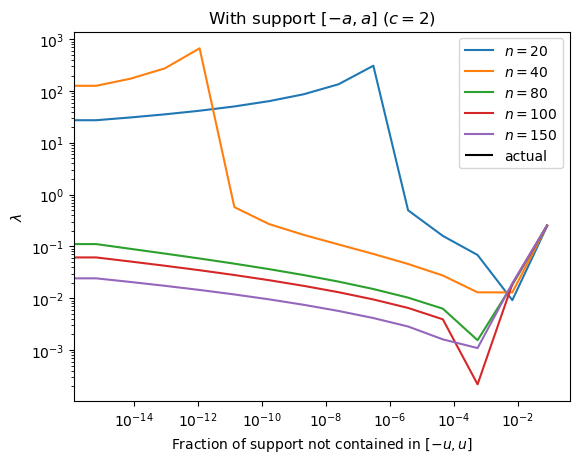

In [10]:
# test of different support

a = np.arange(5,100,5)
mu = 0
c = 2

b = d.b_constraint_laplace(mu,c)
ns = [20,40,80,100,150]

l_arr = np.zeros(len(a))

fig = plt.figure(dpi=100)

ax = plt.subplot()
xx = 1-(2*laplace.cdf(a, loc=mu, scale=c)-1)
for j, n in enumerate(ns):
    for i, u in enumerate(a):
        l = -u
        ob_laplace = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=b,
                            f_vector=d.f_constraint_laplace,
                            f_param=[mu])
        ob_laplace._algorithm(warning=False)
        l_arr[i] = ob_laplace._calc_error(d.lambda_actual_laplace(mu,c))
    ax.plot(xx, l_arr, label=f"$n={n}$")

ax.hlines(d.lambda_actual_laplace(mu,c), min(xx),max(xx),label="actual",
          color="black")
ax.legend()
ax.set_xlabel("Fraction of support not contained in $[-u,u]$")
ax.set_ylabel("$\\lambda$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f"With support $[-a,a]$ ($c={c}$)")
plt.show()

In [11]:
# ns = np.arange(20,200,5)
# mu = 0
# c = 2
# b = np.array([c])
# l,u = -20,20

# l_arr = np.zeros(len(ns))

# fig = plt.figure(dpi=100)
# ax = plt.subplot()

# for i in range(len(ns)):
#     ob_laplace = MaxEnt(support=(l,u),
#                         n_quadrature=ns[i],
#                         b_constraints=b,
#                         f_vector=f_laplace,
#                         message=False)
#     ob_laplace._algorithm()
#     l_arr[i] = ob_laplace._la[0]

# ax.hlines(lambda_laplace_actual(c), min(ns),max(ns),label="Actual",color="r")
# ax.plot(ns, l_arr, label="$\\lambda^1$")
# ax.legend()
# ax.set_title("Varying $n$ (with support [-20,20])")

# plt.show()

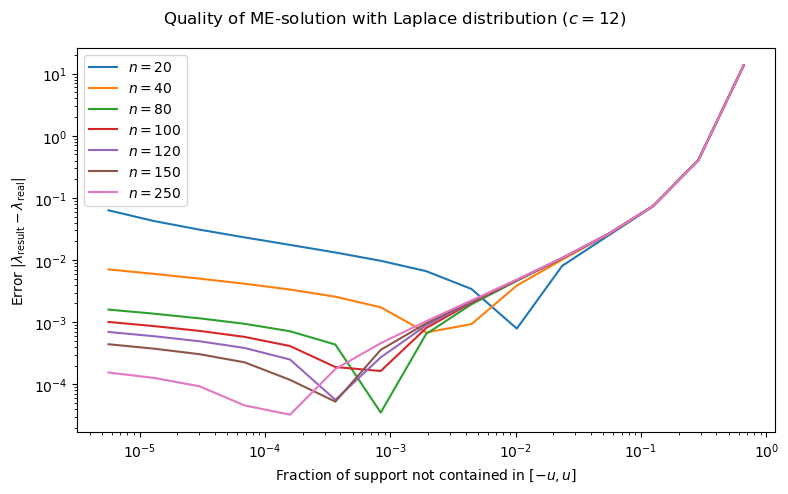

In [12]:
# test of different supports and different quadrature sizes
mu = 0
c = 12
b = d.b_constraint_laplace(mu,c)

a = np.arange(5,150,10) # support [-a,a]

ns = [20,40,80,100,120,150,250]

l_arr = np.zeros(len(a))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(2*laplace.cdf(a, loc=mu, scale=s2)-1)
for i, n in enumerate(ns):
    for j, u in enumerate(a):
        l = -u
        ob_laplace = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=b,
                            f_vector=d.f_constraint_laplace,
                            f_param=[mu])
        ob_laplace._algorithm(warning=False)
        l_arr[j] = ob_laplace._calc_error(d.lambda_actual_laplace(mu,c))
    ax.plot(xx, l_arr, label=f"$n={n}$")

ax.legend()
ax.set_xlabel("Fraction of support not contained in $[-u,u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with Laplace distribution ($c={c}$)")
plt.tight_layout()
plt.show()

3.Exponential

The resulting parameters:
  Lambda_1 = -2.000


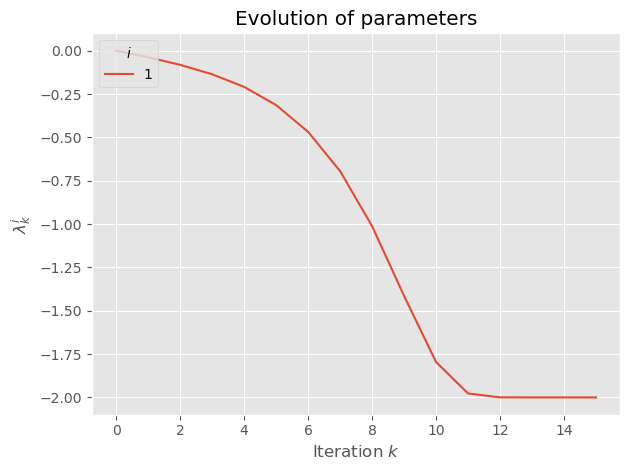

Estimate of absolute integration error of norm. const.: 1.435e-14


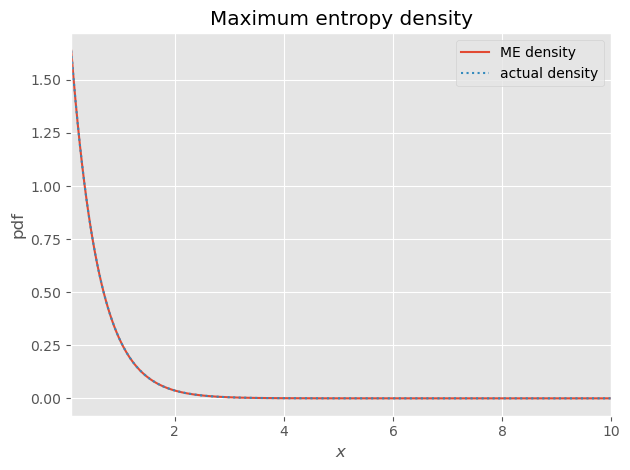

The (Euclidian) distance between result and actual parameter:
2.183e-13


In [2]:
a=2 #>0

b = d.b_constraint_expon(a)
l,u = 0,40
n = 80

ob_rayleigh = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=b,
                     f_vector=d.f_constraint_expon)
ob_rayleigh._algorithm()
ob_rayleigh._visualize_algorithm()
ob_rayleigh._visualize_solution(xlim=(0.1,10),
                                actual_density=d.expon_pdf, 
                                actual_param=[0,a],
                                actual_lambda=d.lambda_actual_expon(a))

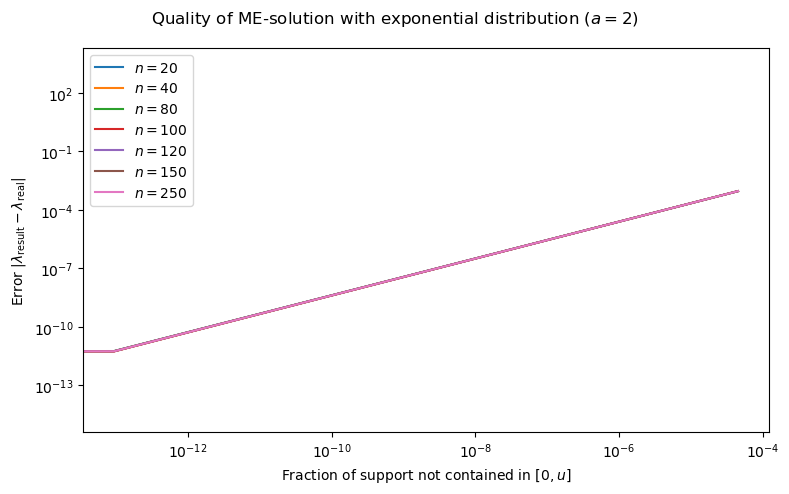

In [3]:
# test of different supports and different quadrature sizes
a = 2
l = 0

b = d.b_constraint_expon(a)

us = np.arange(5,200,10) # support [0,a]

ns = [20,40,80,100,120,150,250]

l_arr = np.zeros(len(us))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(expon.cdf(us, loc=0, scale=1/a))

for i, n in enumerate(ns):
    for j, u in enumerate(us):
        ob_expon = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=b,
                            f_vector=d.f_constraint_expon)
        ob_expon._algorithm(warning=False)
        l_arr[j] = ob_expon._calc_error(d.lambda_actual_expon(a))
    ax.plot(xx, l_arr, label=f"$n={n}$")

ax.legend()
ax.set_xlabel("Fraction of support not contained in $[0,u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with exponential distribution ($a={a}$)")
plt.tight_layout()
plt.show()

4. Pareto

In [ ]:
# a_min = 0.1 #>0
# a_max = .4
# N = 100
# a_arr = np.linspace(a_min, a_max, N)
# arr = np.zeros(N)

# xm = 2 #>0

# l,u = 2.01,40
# n = 180


# for i in range(N):
#     b = d.b_constraint_pareto(xm,a_arr[i])
#     ob_pareto = MaxEnt(support=(l,u),
#                        n_quadrature=n,
#                        b_constraints=b,
#                        f_vector=d.f_constraint_pareto, 
#                        message=False)
#     ob_pareto._algorithm(warning=False)
#     arr[i] = ob_pareto._result_l_val[0]

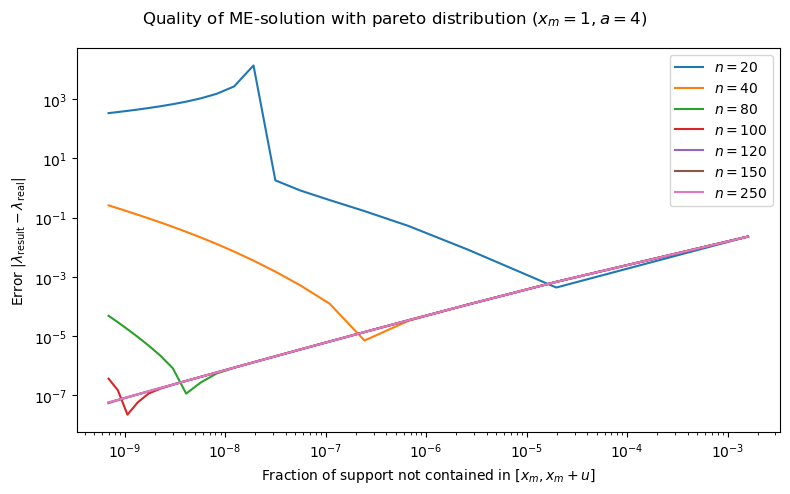

In [ ]:
# test of different supports and different quadrature sizes
a = 4
xm = 1
l = xm

b = d.b_constraint_pareto(xm,a)

us = xm+np.arange(5,200,10) # support [xm,xm+a]

ns = [20,40,80,100,120,150,250]

l_arr = np.zeros(len(us))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(pareto.cdf(us, a,loc=xm))

for i, n in enumerate(ns):
    for j, u in enumerate(us):
        ob_pareto = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=b,
                            f_vector=d.f_constraint_pareto)
        ob_pareto._algorithm(warning=False)
        l_arr[j] = ob_pareto._calc_error(d.lambda_actual_pareto(xm,a))
    ax.plot(xx, l_arr, label=f"$n={n}$")


ax.legend()
ax.set_xlabel("Fraction of support not contained in $[x_m,x_m+u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with pareto distribution ($x_m={xm},a={a}$)")
plt.tight_layout()
plt.show()

In [4]:
# plt.scatter(a_arr,arr)
# plt.plot(a_arr,-a_arr-1)
# plt.show()

In [13]:
#a=0.33 causes trouble
a = .34

xm = 2 #>0

l,u = 2.01,40
n = 100

True
The resulting parameters:
  Lambda_1 = -5.000


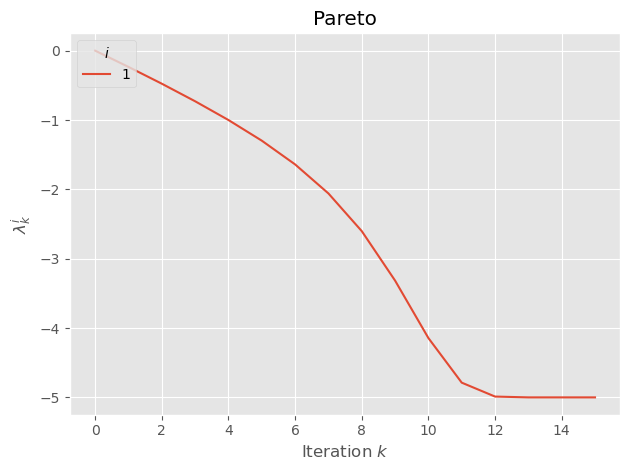

In [7]:
b = d.b_constraint_pareto(xm,a)
ob_pareto = MaxEnt(support=(l,u),
                   n_quadrature=n, 
                   b_constraints=b, 
                   f_vector=d.f_constraint_pareto)
ob_pareto._algorithm(warning=False)
print(ob_pareto._converges)
ob_pareto._visualize_algorithm(title="Pareto")


In [10]:
ls = [2.01,2.1,2.7]
us = np.linspace(20,100,7)
n = 100
results = np.zeros(len(us))

for i in range(len(us)):
    b = d.b_constraint_pareto(xm,a)
    ob_pareto = MaxEnt(support=(ls[0], us[i]), 
                       n_quadrature=n, 
                       b_constraints=b, 
                       f_vector=d.f_constraint_pareto)
    ob_pareto._algorithm(warning=False)
    results[i] = ob_pareto._la[0]

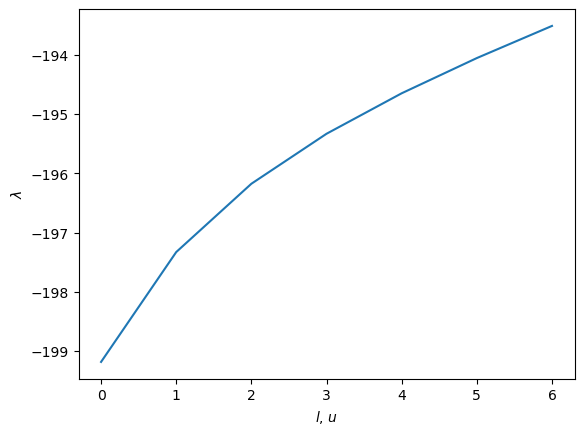

In [11]:
fig,ax=plt.subplots(dpi=100)
ax.plot(results)
ax.set_xlabel("$l$, $u$")
ax.set_ylabel("$\\lambda$")
plt.show()

In [12]:
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

In [13]:
a = 0.32
xm = 2 #>0

l,u = 2.01,60
n = 200

b = d.b_constraint_pareto(xm,a)

ob_pareto = MaxEnt(support=(l, u),
                   n_quadrature=n, 
                   b_constraints=b, 
                   f_vector=d.f_constraint_pareto)
ob_pareto._algorithm(warning=False)
# ob_pareto._visualize_algorithm(title="Pareto")

In [14]:
def convergence_plot(X, Y, Z, xlab="Parameter 1", ylab="Parameter 2"):
    # data = convergence_indicator_mat
    fig, ax = plt.subplots() 
    
    ax.set_title("Convergence indicator") 
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

    cset1 = ax.contourf(X,Y,Z,levels=1)

    fig.colorbar(cset1, ax=ax)
    plt.savefig('pixel_plot.pdf') 
    plt.show() 

In [15]:
N_a = 20
N_u = 40

arr_a = np.linspace(0.1, 2, N_a)
arr_u = np.linspace(5, 500, N_u)
As, Us = np.meshgrid(arr_a,arr_u)

convergence_indicator_mat = np.zeros((N_a,N_u))

xm = 2 #>0
n = 100

l = 2.1

for i in range(N_a):
    a = arr_a[i]
    b = d.b_constraint_pareto(xm,a)
    for j in range(N_u):
        u = arr_u[j]
        ob_pareto = MaxEnt(support=(l,u),
                           n_quadrature=n, 
                           b_constraints=b, 
                           f_vector=d.f_constraint_pareto)
        ob_pareto._algorithm(warning=False)
        if(ob_pareto._converges):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0

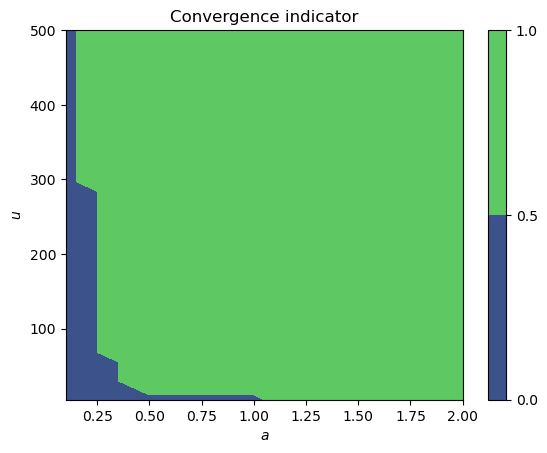

In [16]:
convergence_plot(As,Us,convergence_indicator_mat.T, xlab="$a$", ylab='$u$')

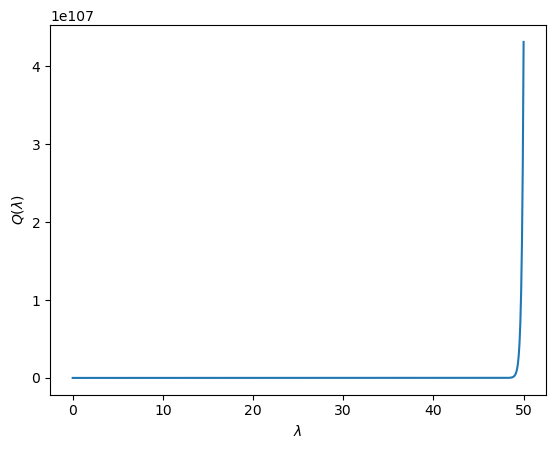

In [17]:
l_min = 0
l_max = 50
N_points = 1100
 
ls = np.linspace(l_min, l_max, N_points)
ys = [ob_pareto._Q(ls[i]) for i in range(N_points)]
plt.plot(ls,ys)
plt.xlabel("$\\lambda$")
plt.ylabel("$Q(\\lambda)$")
plt.show()

3. Rayleigh

In [10]:
s2 = .6
b = d.b_constraint_rayleigh(s2)

l,u = 0,40
n = 100

/home/liselotp/miniconda3/lib/python3.12/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


The resulting parameters:
  Lambda_1 = -0.833
  Lambda_2 = 1.000


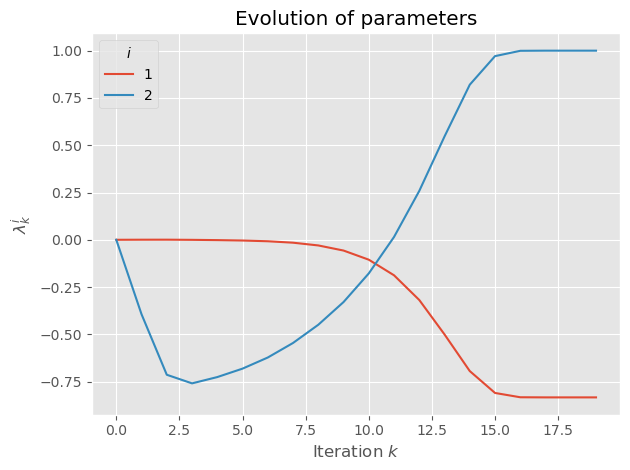

Estimate of absolute integration error of norm. const.: 1.785e-09


/home/liselotp/miniconda3/lib/python3.12/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


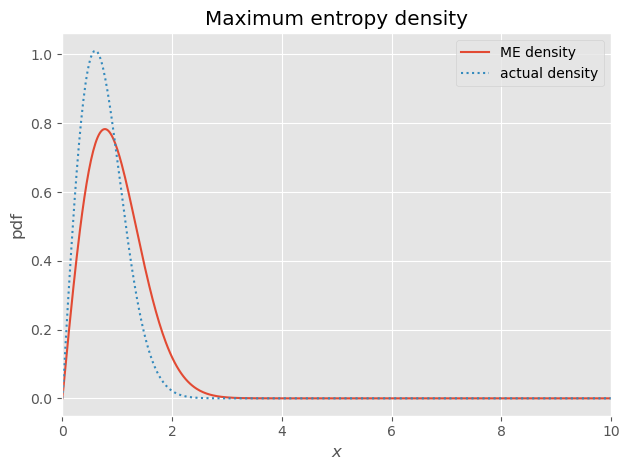

The (Euclidian) distance between result and actual parameter:
4.409e-05


In [11]:

ob_rayleigh = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=b,
                     f_vector=d.f_constraint_rayleigh)
ob_rayleigh._algorithm()
ob_rayleigh._visualize_algorithm()
ob_rayleigh._visualize_solution(xlim=(0,10),
                                actual_density=d.rayleigh_pdf,
                                actual_param=[0,s2],
                                actual_lambda=d.lambda_actual_rayleigh(s2))

Correct result!

4. Maxwell-Boltzmann

In [19]:
b=1

def f_MaxBoltz(x):
    return np.array([x**2, anp.log(x)])
b = np.array([3 * b**2, 1+ np.log(b/np.sqrt(2)) - np.euler_gamma/2])

l,u = 0, 40
n = 40

/home/liselotp/miniconda3/lib/python3.12/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


The following methods are available: 
        _algorithm(k_max, start):  run algorithm and store resulting parameters in self._result_l_val
            - k_max: amount of iterations for which the algo will run
            - start: (optional) initial value of parameters lambda. 
                        By default, np.zeros(self._dimension)
        _visualize_algorithm(title=): Show figure with evolution of lambda_k through algorithm, 
                            and resulting value for lambda. HAS to be run AFTER _algorithm!
            - title: optional
        _visualize_solution(title=):  Plot resulting max-ent distribution
            - title: optional

The resulting parameters:
  Lambda_1 = -0.500
  Lambda_2 = 2.000


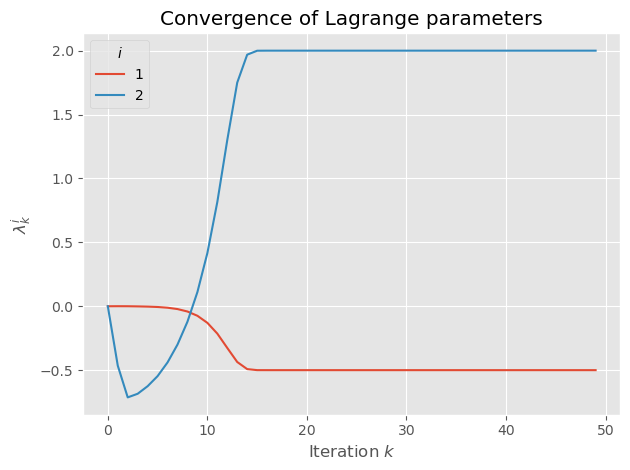

In [20]:
ob_MaxBoltz = MaxEnt(l,u,n,b,f_MaxBoltz)
ob_MaxBoltz._algorithm(50)
ob_MaxBoltz._visualize_algorithm()

5. Von Mises

In [124]:
from scipy.special import iv #modified bessel function of first kind

The resulting parameters:
  Lambda_1 = 0.100
  Lambda_2 = -0.000


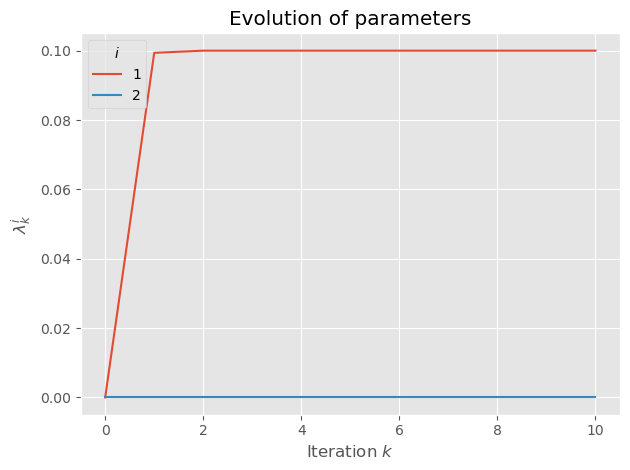

Estimate of absolute integration error of norm. const.: 1.858e-09


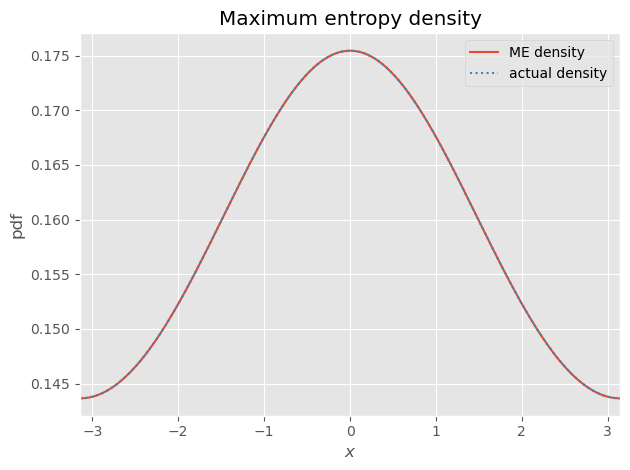

The (Euclidian) distance between result and actual parameter:
3.373e-15


In [6]:
mu = 0
k  = .1
#answers should be k cos(mu)
#and k sin(mu)

b = d.b_constraint_vonmises(mu,k)

l,u = -np.pi, np.pi
n = 250
ob_VonMises = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=b,
                     f_vector=d.f_constraint_vonmises)
ob_VonMises._algorithm()
ob_VonMises._visualize_algorithm()
ob_VonMises._visualize_solution(xlim=(-np.pi,np.pi),
                                actual_density=d.vonmises_pdf,
                                actual_param=[mu,k],
                                actual_lambda=d.lambda_actual_vonmises(mu,k))

/tmp/ipykernel_2338/470496045.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


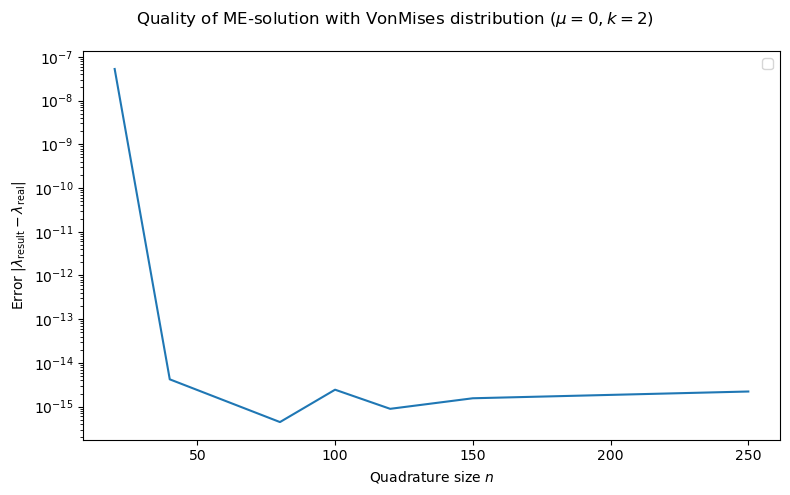

In [ ]:
# test of different quadrature sizes
mu = 0
k = 2
l,u = -np.pi,np.pi

b = d.b_constraint_vonmises(mu,k)

ns = [20,40,80,100,120,150,250]
l_arr = np.zeros(len(ns))

fig, ax = plt.subplots(1,1,figsize=(8,5))

for i, n in enumerate(ns):
    ob_vonmises = MaxEnt(support=(l,u),
                        n_quadrature=n,
                        b_constraints=b,
                        f_vector=d.f_constraint_vonmises)
    ob_vonmises._algorithm(warning=False)
    l_arr[i] = ob_vonmises._calc_error(d.lambda_actual_vonmises(mu,k))


ax.plot(ns,l_arr)
# ax.legend()
ax.set_xlabel("Quadrature size $n$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
# ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with VonMises distribution ($\\mu={mu},k={k}$)")
plt.tight_layout()
plt.show()

In [ ]:
# ns=np.linspace(20,105,10)
# results = np.zeros(len(ns))

# for i in range(len(ns)):
#     ob_VonMises = MaxEnt(l,u,ns[i],b,f_VonMises, message=False)
#     ob_VonMises._algorithm(50, warning=False)
#     results[i] = ob_VonMises._result_l_val[1]

# plt.plot(ns, results)
# plt.xlabel("$n$")
# plt.ylabel("$\\lambda$")
# plt.show()

In [4]:
# Load and format data
# dem = cbook.get_sample_data('jacksboro_fault_dem.npz')

# ls = np.array([[[i,j] for i in range(100)]for j in range(100)])/10

# z = np.array([[ob_VonMises._Q(ls[i][j]) for i in range(100)] for j in range(100)])
# print(z)
# nrows, ncols = z.shape
# x = np.linspace(0, 10, ncols)
# y = np.linspace(0, 10, nrows)
# x, y = np.meshgrid(x, y)

# # region = np.s_[5:50, 5:50]
# # x, y, z = x[region], y[region], z[region]

# # Set up plot
# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# ls = LightSource(270, 45)
# # To use a custom hillshading mode, override the built-in shading and pass
# # in the rgb colors of the shaded surface calculated from "shade".
# rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
# surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
#                        linewidth=0, antialiased=False, shade=False)

# plt.show()

6. Skew-Kurt

In [ ]:
# def to_skewness(mean, second, third):
#     return (third-3*mean*(second+mean**2) - mean**3)/(second+mean**2)**1.5

# def to_kurtosis(mean, second, third, fourth):
#     fourth_central_moment = fourth - 4*mean*third + 6*mean**2*second - 3*mean**4
#     var = second-mean**2
#     return fourth_central_moment/var**2

In [ ]:
#assume mean=0, var=1
def f_SkewKurt(x):
    return np.array([x,x**2,x**3,x**4])

b_skewkurt = np.array([0, 1, skew, kurt])
l = -10
u = 10
n = 40

The resulting parameters:
  Lambda_1 = 0.000
  Lambda_2 = -0.500
  Lambda_3 = 0.000
  Lambda_4 = 0.000


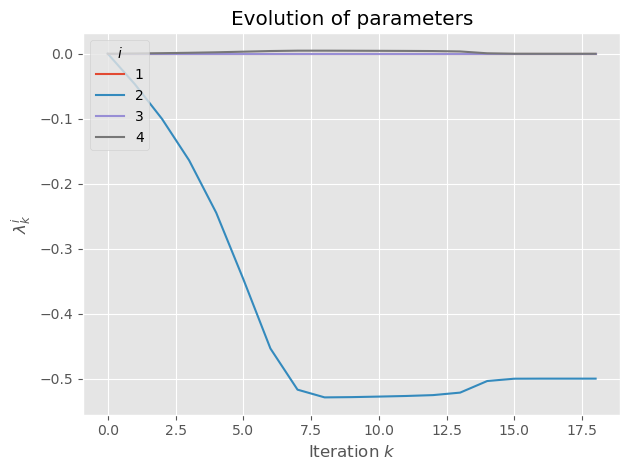

Estimate of absolute integration error of norm. const.: 2.174e-09


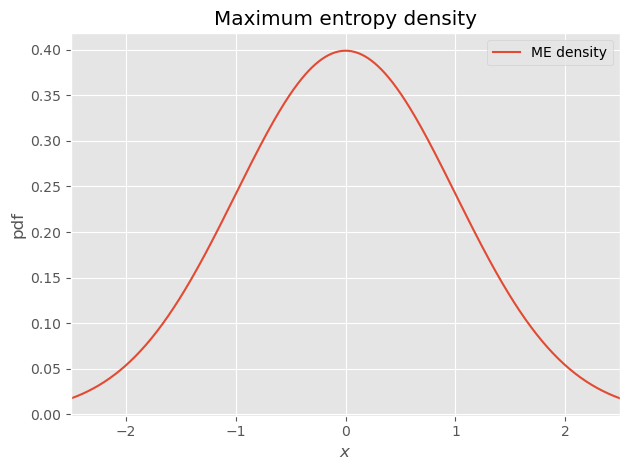

In [7]:
skew, kurt = -0, 3 

ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=b_skewkurt,
                     f_vector=f_SkewKurt)
ob_skewkurt._algorithm()
ob_skewkurt._visualize_algorithm()
ob_skewkurt._visualize_solution(xlim=(-2.5,2.5))